In [1]:
from cmath import sqrt
import numpy as np


def findIndex(bucket, array):
    #Fungsi ini akan menerima dataset awal dan mencari indeks dari elemennya
    idx = 0
    for i in bucket:
        if(i[0] == array[0] and i[1] == array[1]):
            return idx
        idx += 1

def farthestPoint(point1, pointn, setOfPoint):
    # Mencari titik terjauh dari kumpulan titik ke garis 
    # Persamaan ax+by+c=0
    m = (point1[1] - pointn[1])/(point1[0] - pointn[0])
    a = m
    b = -1
    c = point1[1] - m*point1[0]
    maks = 0
    pmaks = []
    
    #Mengiterasi jarak untuk setiap titik
    for i in setOfPoint:
        temp = abs((a*i[0] + b*i[1] + c)/sqrt(a*a + b*b))
        if temp >= maks:
            maks = temp
            pmaks = i
    return pmaks


def outerPoint(p1, p2, s):
    #Mencari titik yang berada diluar segitiga atau garis p1p2
    part = np.array([p1, p2])
    for i in range(len(s)):
        a = p1[0] * p2[1] + s[i, 0] * p1[1] + p2[0] * s[i, 1]
        b = s[i, 0] * p2[1] + p2[0] * p1[1] + p1[0] * s[i, 1]
        det = a-b
        if det > 0:
            part = np.append(part, [s[i]], axis=0)
    part = np.unique(part, axis=0)
    return part


def DandC(bucket, p1, p2, s):
    #Proses Divide dan Conquer yang mirip rekursif
    #Akan mengembalikan hull atau solusi dari upa-persoalan
    if(len(s) == 2):
        pos1 = findIndex(bucket, p1)
        pos2 = findIndex(bucket, p2)
        hull = np.array([[pos1, pos2]])
    else:
        pmaks = farthestPoint(p1, p2, s)
        s1 = outerPoint(p1, pmaks, s)
        s2 = outerPoint(pmaks, p2, s)
        hull1 = DandC(bucket, p1, pmaks, s1)
        hull2 = DandC(bucket, pmaks, p2, s2)
        hull = np.append(hull1, hull2, axis=0)
    return hull


def convexHull(bucket):
    sorted_bucket = sorted(bucket, key=lambda x: [x[0], x[1]])
    sorted_bucket = np.asarray(sorted_bucket)
    arrayLength = len(sorted_bucket)
    p1 = sorted_bucket[0]
    pn = sorted_bucket[arrayLength-1]

    # Membuat dua area baru
    # s1 untuk det positif atau dikiri
    # s2 untuk det negatif atau dikanan
    s1 = np.array([p1])
    s1 = np.append(s1, [pn], axis=0)
    s2 = s1
    for i in range(1, arrayLength-1):
        det = sorted_bucket[0, 0] * sorted_bucket[arrayLength-1, 1] + sorted_bucket[i, 0] * sorted_bucket[0, 1] + sorted_bucket[arrayLength-1, 0] * sorted_bucket[i,
                                                                                                                                                                  1] - sorted_bucket[i, 0] * sorted_bucket[arrayLength-1, 1] - sorted_bucket[arrayLength-1, 0] * sorted_bucket[0, 1] - sorted_bucket[0, 0] * sorted_bucket[i, 1]
        if det > 0:
            s1 = np.append(s1, [sorted_bucket[i]], axis=0)
        elif det < 0:
            s2 = np.append(s2, [sorted_bucket[i]], axis=0)
    s2 = np.unique(s2, axis=0)
    s1 = np.unique(s1, axis=0)

    #Divide menjadi upa-persoalan
    hull1 = DandC(bucket, p1, pn, s1)
    hull2 = DandC(bucket, pn, p1, s2)

    #Combine solusi dari upa-persoalan
    hull = np.append(hull1, hull2, axis=0)

    return hull


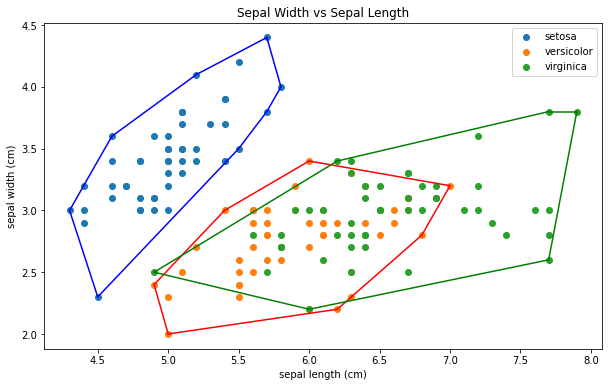

In [2]:
# Contoh penggunaan

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


data = datasets.load_iris()
# create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:, [0, 1]].values
    hull = convexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        # Simple disini isinya pasangan urutan titik di bucket
        # pasangan tersebut akan dihubungkan garis/diplotkan
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()
